In [1]:
#imports
import numpy as np
from at_synapse_detection import processDetections as pd
from at_synapse_detection import SynapseDetection as syn
from at_synapse_detection import dataAccess as da
from at_synapse_detection import synaptogram
import importlib
import matplotlib.pyplot as plt
from skimage import measure
import scipy.ndimage as ndimage
from shapely import geometry
import math
import scipy

In [ ]:
importlib.reload(pd)
importlib.reload(syn)
importlib.reload(da)

In [4]:
probvol = np.load('/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/Synapsin_probvol.npy')

In [5]:
print("let's go: ", probvol.shape)

let's go:  (441, 420, 50)


<IPython.core.display.Javascript object>


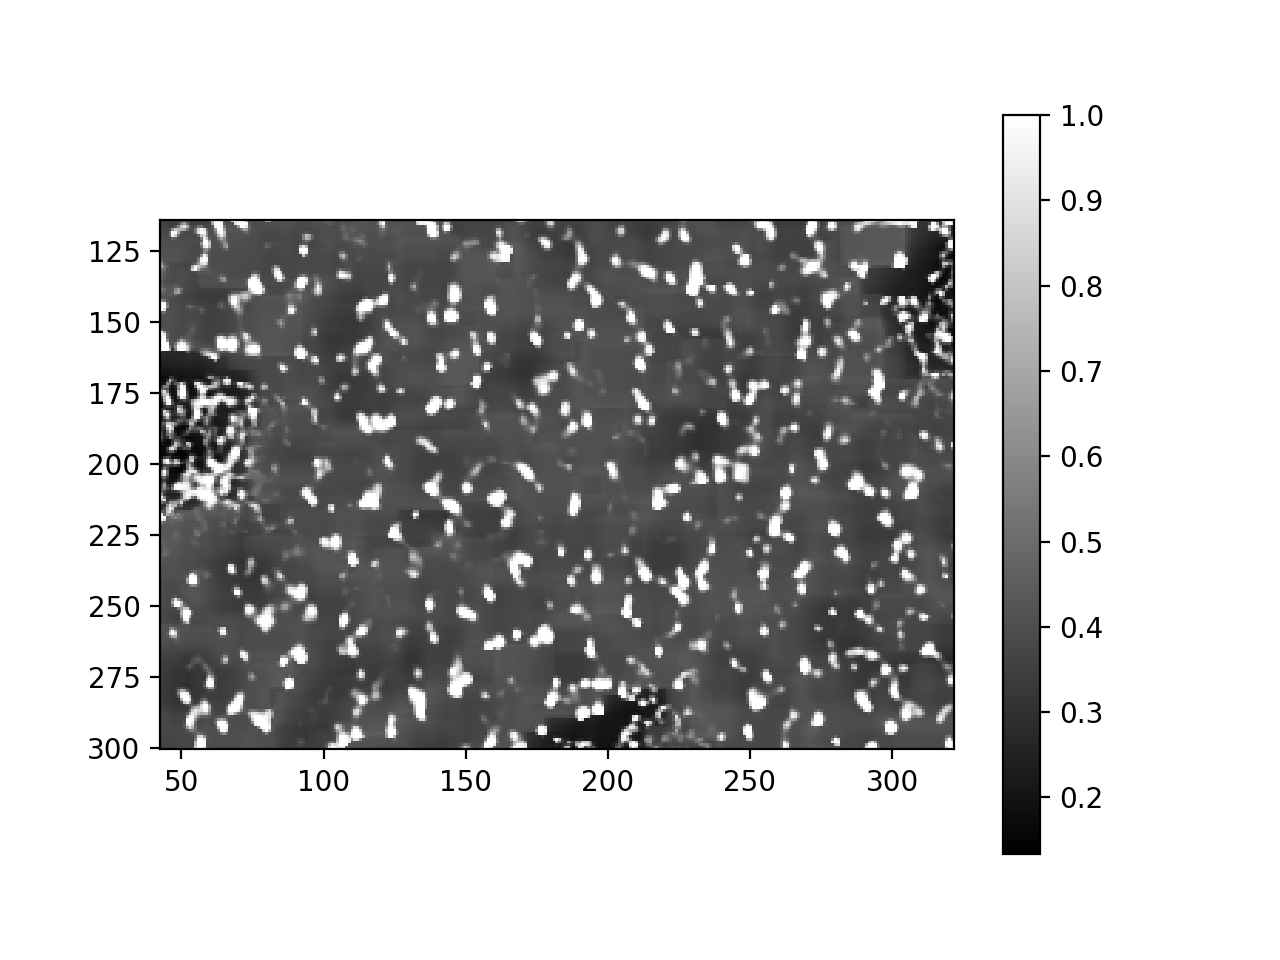

In [11]:
%matplotlib notebook

plt.imshow(probvol[:, :, 44], cmap='gray')
plt.colorbar()


In [13]:
args = {
    "EM_annotation_json":"../data/M247514_Rorb_1/Site3Align2/json_annotations/m247514_Site3Annotation_MN_global_v2.json",
    "LM_annotation_json":"../data/M247514_Rorb_1/Site3Align2/results/resultVol9.json",
    "EM_metadata_csv":"../data/M247514_Rorb_1/Site3Align2/MNSite3Synaptograms_v2.csv",
    "LM_metadata_file":"../data/M247514_Rorb_1/Site3Align2/site3_metadata.json",
    "EM_inclass_column":"glutsynapse",
    "EM_not_synapse_column":"ConsensusNotSynapse",
    "output_json":"../data/M247514_Rorb_1/Site3Align2/results/Anish_evaluation_output.json", 
    "annotationToRemove": "../data/M247514_Rorb_1/Site3Align2/missedanno.json"
    }
metadataFN = '../data/M247514_Rorb_1/Site3Align2/site3_metadata.json'
metadata = syn.loadMetadata(metadataFN)
queryFN = metadata['querylocation']
listOfQueries = syn.loadQueriesJSON(queryFN)

/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/resultVol0.npy
156
156
EM_per_LM [ 0.47605225  0.42815675  0.095791  ]
LM_per_EM [ 0.22874807  0.75888717  0.01236476]
lm edge detections: 9249
em edge annotations 156
LM detections: 9944


In [ ]:
listOfQueryNumbers = [  0]
listOfThresholds   = [0.7]
queryresult = pd.combineResultVolumes(listOfQueryNumbers, listOfThresholds, metadata, args)

In [14]:
queryresult.keys()

dict_keys(['good_annotations', 'EM_edge', 'false_positives', 'tp_detections', 'LM_edge', 'overlap_matrix', 'missed_annotations'])

In [15]:
missed_annotations = queryresult['missed_annotations']
missed_anno_ids = pd.getMissedAnnoIds(missed_annotations)
